<h2>Classification Case-Studies: Logistic Regression</h2>

<ul>
  <li>Data preprocessing</li>
  <li>Exploratory Data Analysis</li>
  <li>Feature Selection and Analysis</li>
  <li>Classification using Logistic Regression</li>
  <li>Feature Analaysis using Logistic Regression</li>
</ul>

<h2>Case Study 1: Early Detection of Parkinson Disease: Predictive modelling and Feature Analysis</h2>

The ElderlyHealth department is a division within MedResearchX Labs dedicated to researching methods for addressing mental health issues affecting the elderly population. One significant focus area within this field is Parkinson's disease, a neurodegenerative disorder characterized by tremors, stiffness, and difficulty with movement. If detected early, Parkinson's disease can be effectively managed. As a data analyst, you've been assigned to develop a data-driven model using historical data ( 'parkinson_disease.csv'). This model aims to accurately <span  style="color:blue"> assess whether an individual has Parkinson's disease or not and 
identify which features are the most explanatory for the disease<span/>.

In [53]:
import warnings
warnings.filterwarnings('ignore')

<b style="color: blue;">Step 1: Load your datasets into pandas</b>

In [54]:
import pandas as pd

df = pd.read_csv('../datasets/parkinson_disease_2.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


<b style="color: blue;">Step 2: Perform EDA using the following requirements</b>
<ol>
  <li>Count the number of rows with missing records - deal with missing values accordingly </li>
  <li>Provide boxplot and density distribution function for each attribute (except status) in the dataset (optional)</li>
  <li>Provide a barplot that shows the number of data point per class label (see status variable)</li>
</ol>

In [55]:
missing_values = df.isnull().sum(axis=1)
rows_missing_values = (missing_values>0).sum()
print('Number of missing values:',rows_missing_values)

clean_df = df.dropna()

missing_values = clean_df.isnull().sum(axis=1)
rows_missing_values = (missing_values>0).sum()
print('Number of missing values-->after denoising:',rows_missing_values)

Number of missing values: 0
Number of missing values-->after denoising: 0


Text(0.5, 1.0, 'Density plot for PPE')

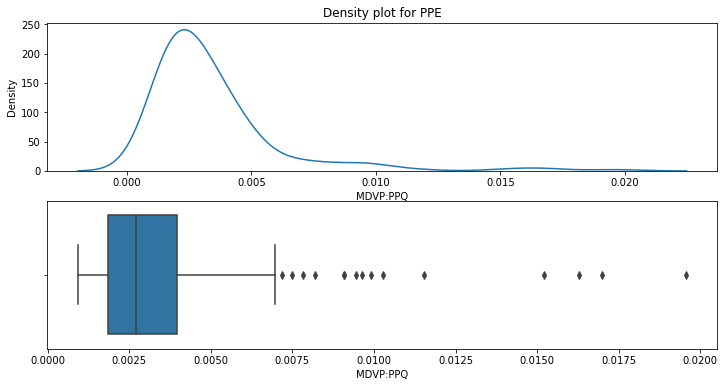

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(12,6))
sns.kdeplot(clean_df['MDVP:PPQ'],ax=axes[0])
sns.boxplot(x=clean_df['MDVP:PPQ'],ax=axes[1])
axes[0].set_title('Density plot for PPE')

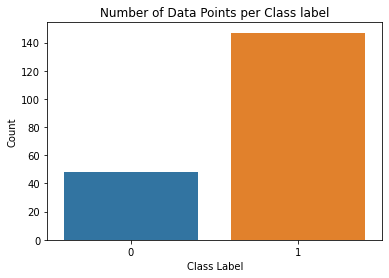

In [57]:
class_counts = clean_df['status'].value_counts()
#class_counts

plt.figure()
sns.barplot(x=class_counts.index,y=class_counts.values)
plt.title('Number of Data Points per Class label')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

<b style="color: blue;">Step 3: Identify features and the target variable in the problem</b>

In [58]:
y = df[['status']]#target
X = df.drop(columns=['status','name'])#features

<b style="color: blue;">Step 4: Feature Engineering, Selection and Analysis</b>

<ol>
    <li>Using Variance thresholding, remove all features below a $\epsilon$ variance level</li>
    <li>Using Mutual Information, rank the importance of each feature against the target variable</li>
    <li>Select the best K features to use in your problem</li>
    <li>You will compare the performance of your model with all features and k features at a later stage</li>
</ol>

<span style="color:blue;">Note: Filter-based feature selection is often used to reduce dimensionality before applying more resource-intense wrapper-based methods. <b>Rule of thumb: 20-30 features is considered low dimensional</b>. Filtering maybe unnecessary.</span>

<span style="color:blue">Why do we filter? Essentially for computational reasons or if domain knowledge requires it. Otherwise use wrapper-based filtering</span>

In [59]:
from sklearn.feature_selection import VarianceThreshold

threshold = 0.0001
selector = VarianceThreshold(threshold)
selector.fit(X)
inds = selector.get_support()

var_filter_feats = X.columns[inds]

print(var_filter_feats)

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Shimmer',
       'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ',
       'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2',
       'PPE'],
      dtype='object')


In [60]:
len(var_filter_feats)

17

<h3>1. Filter-based</h3>

In [61]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

Natts = len(var_filter_feats)
N_perc = 0.8
featScaler = SelectKBest(mutual_info_classif,k=int(N_perc*Natts))
X_filter = featScaler.fit(X.loc[:,var_filter_feats],y)

mask = featScaler.get_support()#
filter_feats = var_filter_feats[mask]
filter_feats

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Shimmer(dB)',
       'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR',
       'spread1', 'spread2', 'PPE'],
      dtype='object')

In [62]:
len(filter_feats)

13

<b style="color: blue;">Step 5: Scale all features using a Standard Scaler and Split the dataset into Training/Test set (80:20)</b>

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Sc = StandardScaler()
X_sc = Sc.fit_transform(X)#normalisa -> std
X_sc = pd.DataFrame(X_sc,columns = X.columns) #get back the dataframe

X_train,X_test,y_train,y_test = train_test_split(X_sc,y,test_size=0.2,random_state=1234)

<b style="color: blue;">Step 6: Build Logistic Regression Models</b>

<ul>
    <li>Logistic Regression with all features: $Lg_{all}$</li>
    <li>Logistic Regression with remaining features after variance thresholding: $Lg_{var}$</li>
    <li>Logistic Regression with k-selected features: $Lg_{k}$</li>
</ul>

In [64]:
from sklearn.linear_model import LogisticRegression

clf_all = LogisticRegression()
clf_vthr = LogisticRegression()
clf_fir = LogisticRegression()

clf_all.fit(X_train,y_train)
clf_vthr.fit(X_train.loc[:,var_filter_feats],y_train)
clf_fir.fit(X_train.loc[:,filter_feats],y_train)

LogisticRegression()

<b style="color: blue;">Step 7: Model Evaluation</b>
<ol>
    <li>Generate Confusion matrices on the test set for each model</li>
    <li>Generate Classification reports for each model </li>
    <li>Comment on the performance of each models</li>
</ol>

In [74]:
#var_filter_feats
#X_test.loc[:,var_filter_feats]

Text(0.5, 1.0, 'Filtered')

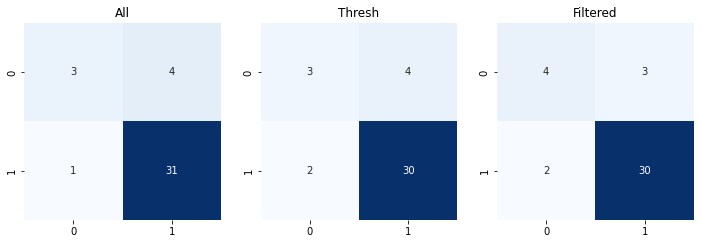

<Figure size 432x288 with 0 Axes>

In [83]:
from sklearn.metrics import confusion_matrix

y_pred_test_all = clf_all.predict(X_test)
y_pred_test_vthr = clf_vthr.predict(X_test.loc[:,var_filter_feats])
y_pred_test_fir = clf_fir.predict(X_test.loc[:,filter_feats])


cm_all_test = confusion_matrix(y_test,y_pred_test_all)
cm_vthr_test = confusion_matrix(y_test,y_pred_test_vthr)
cm_fir_test = confusion_matrix(y_test,y_pred_test_fir)


fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(12,6))

plt.figure()
sns.heatmap(cm_all_test,ax=axes[0],annot=True,fmt="d",cmap="Blues",cbar=False,square=True)
sns.heatmap(cm_vthr_test,ax=axes[1],annot=True,fmt="d",cmap="Blues",cbar=False,square=True)
sns.heatmap(cm_fir_test,ax=axes[2],annot=True,fmt="d",cmap="Blues",cbar=False,square=True)
#plt.xlabel('Predicted')
#plt.ylabel('Actual')
#plt.title('Confusion Matrix - Test/All')
#plt.show()
axes[0].set_title('All')
axes[1].set_title('Thresh')
axes[2].set_title('Filtered')

In [88]:
from sklearn.metrics import classification_report
targets = ['no-parkinson','has-parkinson']
print('--all features---')
print(classification_report(y_test, y_pred_test_all,target_names=targets))
print('--Var Threshold features---')
print(classification_report(y_test, y_pred_test_vthr,target_names=targets))
print('-- MI features---')
print(classification_report(y_test, y_pred_test_fir,target_names=targets))


--all features---
               precision    recall  f1-score   support

 no-parkinson       0.75      0.43      0.55         7
has-parkinson       0.89      0.97      0.93        32

     accuracy                           0.87        39
    macro avg       0.82      0.70      0.74        39
 weighted avg       0.86      0.87      0.86        39

--Var Threshold features---
               precision    recall  f1-score   support

 no-parkinson       0.60      0.43      0.50         7
has-parkinson       0.88      0.94      0.91        32

     accuracy                           0.85        39
    macro avg       0.74      0.68      0.70        39
 weighted avg       0.83      0.85      0.84        39

-- MI features---
               precision    recall  f1-score   support

 no-parkinson       0.67      0.57      0.62         7
has-parkinson       0.91      0.94      0.92        32

     accuracy                           0.87        39
    macro avg       0.79      0.75      0.77    

<b style="color: blue;">Step 8: Feature Analysis using Logistic Regression</b>
    <ol>
    <li>Using the coefficients of model: $Lg_{all}$, rank the contribution of each feature to identify of Parkinson disease</li>
        <li> Use may use the absolute value of each coefficient as your ranking score: $|\theta_i|$</li>
    <li>Generate a dataframe of feature importance and provide a barplot</li>
    </ol>

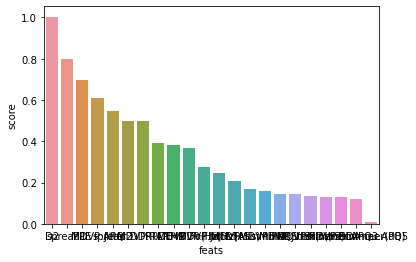

In [103]:
#p/(1-p) = a + a_1x_1 + a_2x_2 +...a_nx_n 
import numpy as np
X.columns
score = np.abs(clf_all.coef_[0])

features_df = pd.DataFrame({'feats':X.columns,'score':score})
features_df_sorted = features_df.sort_values(by=['score'],ascending=False)
sns.barplot(data=features_df_sorted,x='feats',y='score')
plt.show()

In [104]:
features_df_sorted

,feats,score
20,D2,1.003265
18,spread1,0.800468
21,PPE,0.698194
12,MDVP:APQ,0.607589
19,spread2,0.544945
7,Jitter:DDP,0.497532
5,MDVP:RAP,0.497190
16,RPDE,0.390693
14,NHR,0.382581
0,MDVP:Fo(Hz),0.364847


<b style="color: blue;">Step 9: Model Training and Wrapper-based Feature Selection</b>

Using all features in the model, implement Sequential Feature Selection to identify
the most optimal feature subset. You may use the $F1_{score}$ as your evaluation metric.
    

<b style="color: blue;">Step 9: Classification Report - Wrapper-based FS</b>

Provide a classification report of your new model on the test set.